# Automated ML

TODO: Import Dependencies. In the cell below, import all the dependencies that you will need to complete the project.

In [70]:
# AzureML imports
from azureml.core import Workspace
from azureml.core import Dataset
from azureml.core import Datastore
from azureml.core import Experiment
from azureml.core import Model
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException
from azureml.train.automl import AutoMLConfig
from azureml.train.automl import utilities
from azureml.widgets import RunDetails
# Other imports
import numpy as np
import pandas as pd
import seaborn as sns

## Dataset

### Overview
TODO: In this markdown cell, give an overview of the dataset you are using. Also mention the task you will be performing.


TODO: Get data. In the cell below, write code to access the data you will be using in this project. Remember that the dataset needs to be external.

In [17]:
ws = Workspace.from_config()
# Import dataset from datastore and convert into dataframe for exploration

dataset = Dataset.get_by_name(ws, name='pima')
df = dataset.to_pandas_dataframe()
# choose a name for experiment
experiment_name = 'pima-exp'

experiment=Experiment(ws, experiment_name)

In [18]:
df.shape

(768, 9)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [29]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [30]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

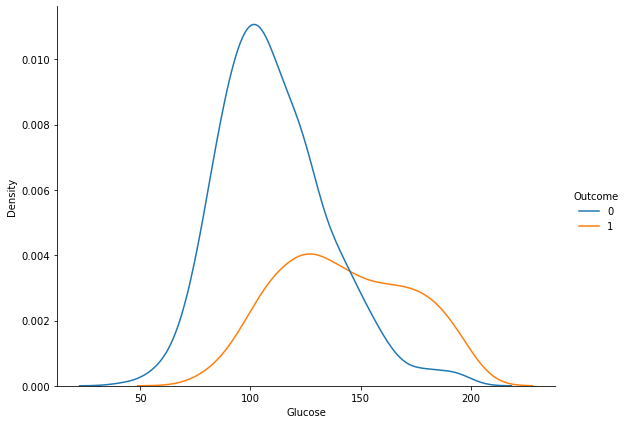

In [39]:
sns.displot(data=df, x='Glucose', height=6, aspect=4/3, kind='kde', hue='Outcome')

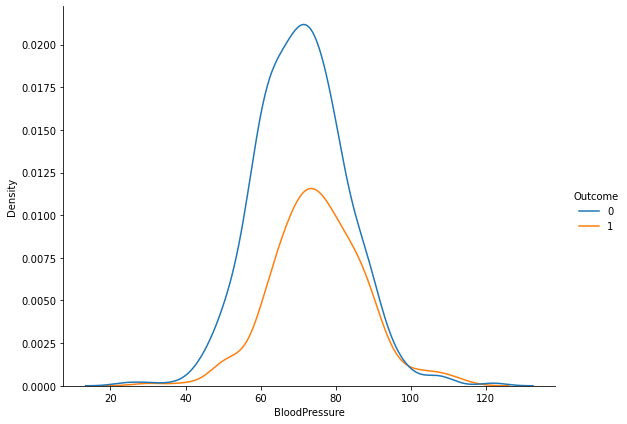

In [40]:
sns.displot(data=df, x='BloodPressure', height=6, aspect=4/3, kind='kde', hue='Outcome')

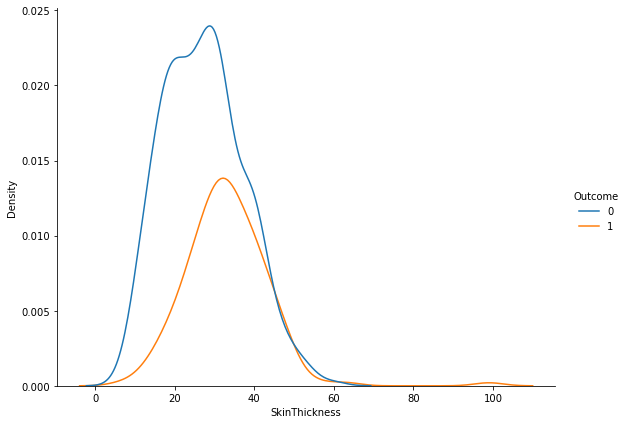

In [41]:
sns.displot(data=df, x='SkinThickness', height=6, aspect=4/3, kind='kde', hue='Outcome')

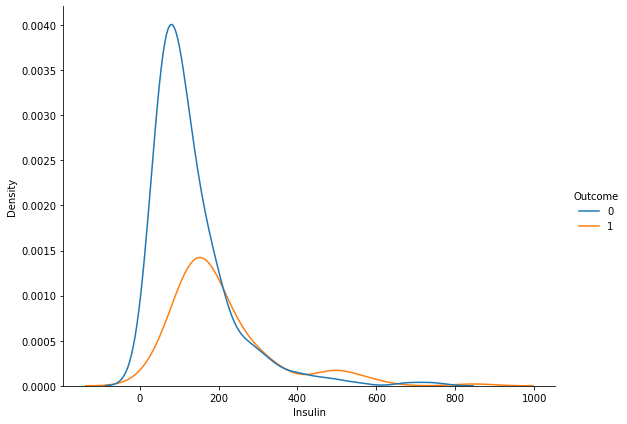

In [42]:
sns.displot(data=df, x='Insulin', height=6, aspect=4/3, kind='kde', hue='Outcome')

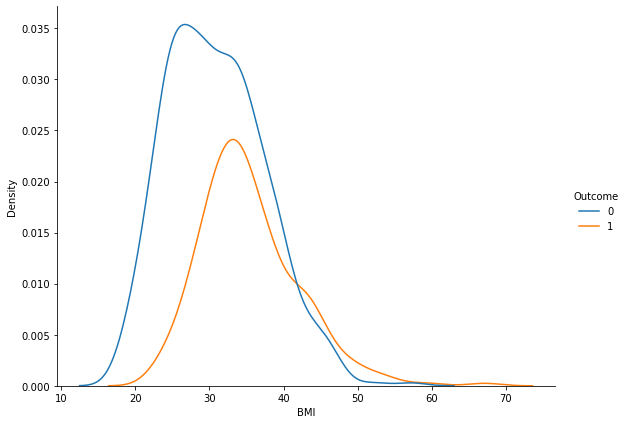

In [43]:
sns.displot(data=df, x='BMI', height=6, aspect=4/3, kind='kde', hue='Outcome')

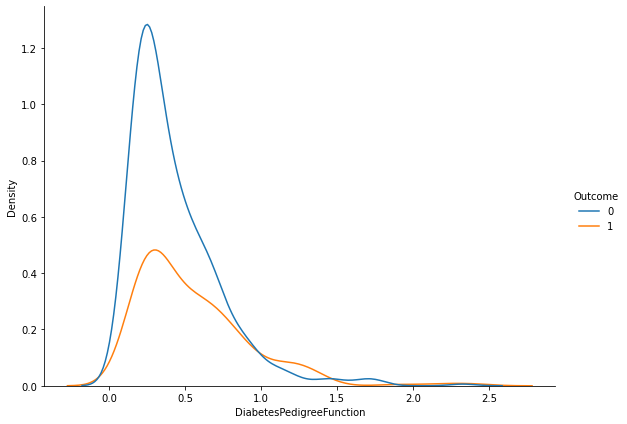

In [44]:
sns.displot(data=df, x='DiabetesPedigreeFunction', height=6, aspect=4/3, kind='kde', hue='Outcome')

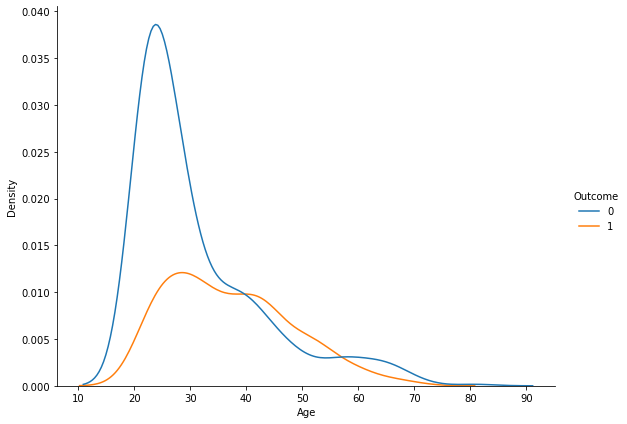

In [45]:
sns.displot(data=df, x='Age', height=6, aspect=4/3, kind='kde', hue='Outcome')

In [46]:
datastore = Datastore.get_default(ws)

In [48]:
dataset = Dataset.Tabular.register_pandas_dataframe(df, datastore, "pima_training_df", show_progress=True)

Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/92833dbd-5bcd-4a38-bcdc-85403c58f8e7/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


In [54]:
# Choose a name for your CPU cluster
cpu_cluster_name = "cpucluster"

# Verify that cluster does not exist already
try:
    cpu_cluster = ComputeTarget(workspace=ws, name=cpu_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    # To use a different region for the compute, add a location='<region>' parameter
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2',
                                                           max_nodes=4)
    cpu_cluster = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

cpu_cluster.wait_for_completion(show_output=True)

InProgress..
SucceededProvisioning operation finished, operation "Succeeded"
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


## AutoML Configuration

TODO: Explain why you chose the automl settings and cofiguration you used below.

In [51]:
utilities.get_primary_metrics('classification')

['accuracy',
 'norm_macro_recall',
 'AUC_weighted',
 'average_precision_score_weighted',
 'precision_score_weighted']

In [58]:
# TODO: Put your automl settings here
# automl_settings = {}

# TODO: Put your automl config here
automl_config = AutoMLConfig(
    experiment_timeout_minutes=30,
    compute_target=cpu_cluster,
    task='classification',
    primary_metric='accuracy',
    featurization='auto',
    training_data=dataset,
    label_column_name='Outcome',
    n_cross_validations=5)

In [59]:
# TODO: Submit your experiment
remote_run = experiment.submit(automl_config, show_output=True)

Submitting remote run.
No run_configuration provided, running on cpucluster with default configuration
Running on remote compute: cpucluster


Experiment,Id,Type,Status,Details Page,Docs Page
pima-exp,AutoML_1faeb1ac-0f89-4d7c-a26d-edeac081886e,automl,NotStarted,Link to Azure Machine Learning studio,Link to Documentation



Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.
Current status: ModelSelection. Beginning model selection.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

****************************************************************************************************

TYPE:         Missing feature values imputation
STATUS:       DONE
DESCRIPTION:  If the missing values are expected, let the run complete. Otherwise cancel the current run and use a script to customize the handling of missing feature values that may be more appropriate based on the data type and business req

## Run Details

OPTIONAL: Write about the different models trained and their performance. Why do you think some models did better than others?

TODO: In the cell below, use the `RunDetails` widget to show the different experiments.

In [62]:
RunDetails(remote_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

## Best Model

TODO: In the cell below, get the best model from the automl experiments and display all the properties of the model.



In [63]:
best_run = remote_run.get_best_child()

In [64]:
best_run

Experiment,Id,Type,Status,Details Page,Docs Page
pima-exp,AutoML_1faeb1ac-0f89-4d7c-a26d-edeac081886e_30,azureml.scriptrun,Completed,Link to Azure Machine Learning studio,Link to Documentation


In [80]:
run_metrics = best_run.get_metrics()

In [83]:
run_metrics

{'precision_score_weighted': 0.787415442771778,
 'f1_score_macro': 0.7597103760966398,
 'precision_score_macro': 0.7665326947508596,
 'norm_macro_recall': 0.513923561440165,
 'recall_score_weighted': 0.7877939054409643,
 'f1_score_micro': 0.7877939054409643,
 'accuracy': 0.7877939054409643,
 'precision_score_micro': 0.7877939054409643,
 'f1_score_weighted': 0.7858614304493353,
 'average_precision_score_macro': 0.8274378016405441,
 'average_precision_score_weighted': 0.8546614749434072,
 'recall_score_macro': 0.7569617807200826,
 'recall_score_micro': 0.7877939054409643,
 'average_precision_score_micro': 0.8664102107784334,
 'balanced_accuracy': 0.7569617807200826,
 'AUC_weighted': 0.8464298334356357,
 'matthews_correlation': 0.5232023791445497,
 'AUC_macro': 0.8464298334356357,
 'log_loss': 0.46945727676942617,
 'weighted_accuracy': 0.8119374205158982,
 'AUC_micro': 0.8642977758632577,
 'confusion_matrix': 'aml://artifactId/ExperimentRun/dcid.AutoML_1faeb1ac-0f89-4d7c-a26d-edeac081886e

In [85]:
print(run_metrics['accuracy'])

0.7877939054409643


In [65]:
#TODO: Save the best model

In [66]:
model_name = best_run.properties['model_name']

In [67]:
model_name

'AutoML1faeb1ac030'

In [69]:
description = 'AutoML best accuracy: VotingEnsemble'
tags = None

model = remote_run.register_model(model_name = model_name, 
                                  description = description, 
                                  tags = tags)

In [79]:
model.run_id

'AutoML_1faeb1ac-0f89-4d7c-a26d-edeac081886e_30'

In [73]:
ws_models = Model.list(workspace=ws)

In [86]:
for model in ws_models:
    print('name:', model.name)

name: AutoML1faeb1ac030


## Model Deployment

Remember you have to deploy only one of the two models you trained but you still need to register both the models. Perform the steps in the rest of this notebook only if you wish to deploy this model.

TODO: In the cell below, register the model, create an inference config and deploy the model as a web service.

TODO: In the cell below, send a request to the web service you deployed to test it.

TODO: In the cell below, print the logs of the web service and delete the service

**Submission Checklist**
- I have registered the model.
- I have deployed the model with the best accuracy as a webservice.
- I have tested the webservice by sending a request to the model endpoint.
- I have deleted the webservice and shutdown all the computes that I have used.
- I have taken a screenshot showing the model endpoint as active.
- The project includes a file containing the environment details.
